<a href="https://colab.research.google.com/github/danielperezok1/Catastrophe-Analysis/blob/main/Exp_01_WorkFlow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7 WorkFlow

### 7.1 Objetivo

Presentar un workflow/pipeline completo al que los estudiantes deberán enriquecer

#### 7.2  Seteo del ambiente en Google Colab

Esta parte se debe correr con el runtime en Python3
<br>Ir al menu, Runtime -> Change Runtime Type -> Runtime type ->  **Python 3**

Conectar la virtual machine donde esta corriendo Google Colab con el  Google Drive, para poder tener persistencia de archivos

In [ ]:
# primero establecer el Runtime de Python 3
from google.colab import drive
drive.mount('/content/.drive')

Mounted at /content/.drive


Para correr la siguiente celda es fundamental en Arranque en Frio haber copiado el archivo kaggle.json al Google Drive, en la carpeta indicada en el instructivo

<br>los siguientes comando estan en shell script de Linux
*   Crear las carpetas en el Google Drive
*   "instalar" el archivo kaggle.json desde el Google Drive a la virtual machine para que pueda ser utilizado por la libreria  kaggle de Python
*   Bajar el  **dataset_pequeno**  al  Google Drive  y tambien al disco local de la virtual machine que esta corriendo Google Colab
*   Bajar el **dataset_historico** al Google Drive y tambien al disco local de la virtual machine que esta corriendo Google Colab



*  Si usted eligió modalidad *Gerencial* entonces NO debe modificar nada, su liderazgo logró que otras trabajaron por usted
*  Si usted eligió modalidad de *Analista Junior*, entonces donde dice archivo="gerencial_competencia_2025.csv.gz"  lo debe cambiar por  archivo="analistajr_competencia_2025.csv.gz"
*  Si usted eligió modalidad *Analista Senior*,  ya se las ingenierá SIN preguntar !

In [ ]:
%%shell

mkdir -p "/content/.drive/My Drive/labo1"
mkdir -p "/content/buckets"
ln -s "/content/.drive/My Drive/labo1" /content/buckets/b1

mkdir -p ~/.kaggle
cp /content/buckets/b1/kaggle/kaggle.json  ~/.kaggle
chmod 600 ~/.kaggle/kaggle.json


mkdir -p /content/buckets/b1/exp
mkdir -p /content/buckets/b1/datasets
mkdir -p /content/datasets


webfiles="https://storage.googleapis.com/open-courses/austral2025-af91/labo1r"
destino_local="/content/datasets"
destino_bucket="/content/buckets/b1/datasets"


archivo="dataset_pequeno.csv"

if ! test -f $destino_bucket/$archivo; then
  wget  $webfiles/$archivo  -O $destino_bucket/$archivo
fi


if ! test -f $destino_local/$pequeno; then
  cp  $destino_bucket/$archivo  $destino_local/$archivo
fi

#-------

archivo="gerencial_competencia_2025.csv.gz"

if ! test -f $destino_bucket/$archivo; then
  wget  $webfiles/$archivo  -O $destino_bucket/$archivo
fi


if ! test -f $destino_local/$pequeno; then
  cp  $destino_bucket/$archivo  $destino_local/$archivo
fi


## 7.3  Workflow

## Inicializacion

Esta parte se debe correr con el runtime en lenguaje **R** Ir al menu, Runtime -> Change Runtime Type -> Runtime type -> R

limpio el ambiente de R

In [ ]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Sat Jul 05 06:47:11 PM 2025"

In [ ]:
# limpio la memoria
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,659633,35.3,1454437,77.7,1433607,76.6
Vcells,1225706,9.4,8388608,64.0,1975128,15.1


In [ ]:
require("data.table")

if( !require("R.utils")) install.packages("R.utils")
require("R.utils")

Loading required package: data.table

Loading required package: R.utils

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘R.utils’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.utils

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.27.1 (2025-05-02 21:00:05 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.13.0 (2025-02-24 21:20:02 UTC) successfully loaded. See ?R.utils for help.




#### Parametros
Si es gerente, no cambie nada
<br>Si es Analista, cambie el nombre del dataset

In [ ]:
PARAM <- list()
PARAM$semilla_primigenia <- 417157

PARAM$experimento <- 7300
PARAM$dataset <- "gerencial_competencia_2025.csv.gz"

#### Carpeta del Experimento

In [ ]:
# carpeta de trabajo

setwd("/content/buckets/b1/exp")
experimento_folder <- paste0("WF", PARAM$experimento)
dir.create(experimento_folder, showWarnings=FALSE)
setwd( paste0("/content/buckets/b1/exp/", experimento_folder ))

### 7.3.1   Preprocesamiento del dataset

#### 7.3.1.1  DT incorporar dataset

In [ ]:
# lectura del dataset
dataset <- fread(paste0("/content/datasets/", PARAM$dataset))

#### 7.3.1.2  CA  Catastrophe Analysis
Se intentan reparar las variables que para un mes están con todos los valores en cero.

In [ ]:
colnames(dataset)

[1] "numero_de_cliente"           "foto_mes"                   
 [3] "internet"                    "cliente_edad"               
 [5] "cliente_antiguedad"          "mrentabilidad"              
 [7] "mrentabilidad_annual"        "mcomisiones"                
 [9] "mactivos_margen"             "mpasivos_margen"            
[11] "cproductos"                  "mcuenta_corriente"          
[13] "mcaja_ahorro"                "cdescubierto_preacordado"   
[15] "mcuentas_saldo"              "ctarjeta_visa_transacciones"
[17] "mtarjeta_visa_consumo"       "mtarjeta_master_consumo"    
[19] "mprestamos_personales"       "cpayroll_trx"               
[21] "mpayroll"                    "ccomisiones_mantenimiento"  
[23] "ccallcenter_transacciones"   "chomebanking_transacciones" 
[25] "ctrx_quarter"                "Master_status"              
[27] "Master_fechaalta"            "Master_mpagominimo"         
[29] "Visa_status"                 "Visa_fechaalta"             
[31] "Visa_mpagominimo"            "clase_ternaria"

In [ ]:
columnas_afectadas <- c(
  "internet", "mrentabilidad", "mrentabilidad_annual", "mcomisiones",
  "mactivos_margen", "mpasivos_margen", "mcuentas_saldo",
  "ctarjeta_visa_transacciones", "mtarjeta_visa_consumo",
  "mtarjeta_master_consumo", "ccallcenter_transacciones", "chomebanking_transacciones"
)

Asigno NA a los valores faltantes.

In [ ]:
for (col in columnas_afectadas) {
  dataset[foto_mes == 202006 & get(col) == 0, (col) := NA]
}

Interpolación lineal para valores faltantes.

In [ ]:
if (!require("zoo")) install.packages("zoo")
library(zoo)
library(data.table)

# Asegura el orden temporal por cliente
setorder(dataset, numero_de_cliente, foto_mes)

# Aplica interpolación lineal por cliente
for (col in columnas_afectadas) {
  set(dataset, j = col, value = as.numeric(dataset[[col]]))  # fuerza a numeric
  dataset[, (col) := na.approx(get(col), x = foto_mes, na.rm = FALSE), by = numero_de_cliente]
}


Loading required package: zoo

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘zoo’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:data.table’:

    yearmon, yearqtr


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




MICE (Multiple Imputation by Chained Equations)

In [ ]:
if (!require("mice")) install.packages("mice")
library(mice)

# Selección de variables auxiliares (pueden afinarse)
variables_utilizadas <- c(columnas_afectadas, "cliente_edad", "cliente_antiguedad", "cproductos", "ctrx_quarter")
subdata <- as.data.frame(dataset[, ..variables_utilizadas])

# Imputación con MICE
mice_result <- mice(subdata, m = 1, method = 'pmm', maxit = 5, seed = 417157)
subdata_imputada <- complete(mice_result)

# Reemplazar en dataset original
dataset[, (columnas_afectadas) := subdata_imputada[, columnas_afectadas]]



 iter imp variable
  1   1  internet  mrentabilidad  mrentabilidad_annual  mcomisiones  mactivos_margen  mpasivos_margen  mcuentas_saldo  ctarjeta_visa_transacciones  mtarjeta_visa_consumo  mtarjeta_master_consumo  ccallcenter_transacciones  chomebanking_transacciones
  2   1  internet  mrentabilidad  mrentabilidad_annual  mcomisiones  mactivos_margen  mpasivos_margen  mcuentas_saldo  ctarjeta_visa_transacciones  mtarjeta_visa_consumo  mtarjeta_master_consumo  ccallcenter_transacciones  chomebanking_transacciones
  3   1  internet  mrentabilidad  mrentabilidad_annual  mcomisiones  mactivos_margen  mpasivos_margen  mcuentas_saldo  ctarjeta_visa_transacciones  mtarjeta_visa_consumo  mtarjeta_master_consumo  ccallcenter_transacciones  chomebanking_transacciones
  4   1  internet  mrentabilidad  mrentabilidad_annual  mcomisiones  mactivos_margen  mpasivos_margen  mcuentas_saldo  ctarjeta_visa_transacciones  mtarjeta_visa_consumo  mtarjeta_master_consumo  ccallcenter_transacciones  chomeba

Warning message:
“Number of logged events: 40”


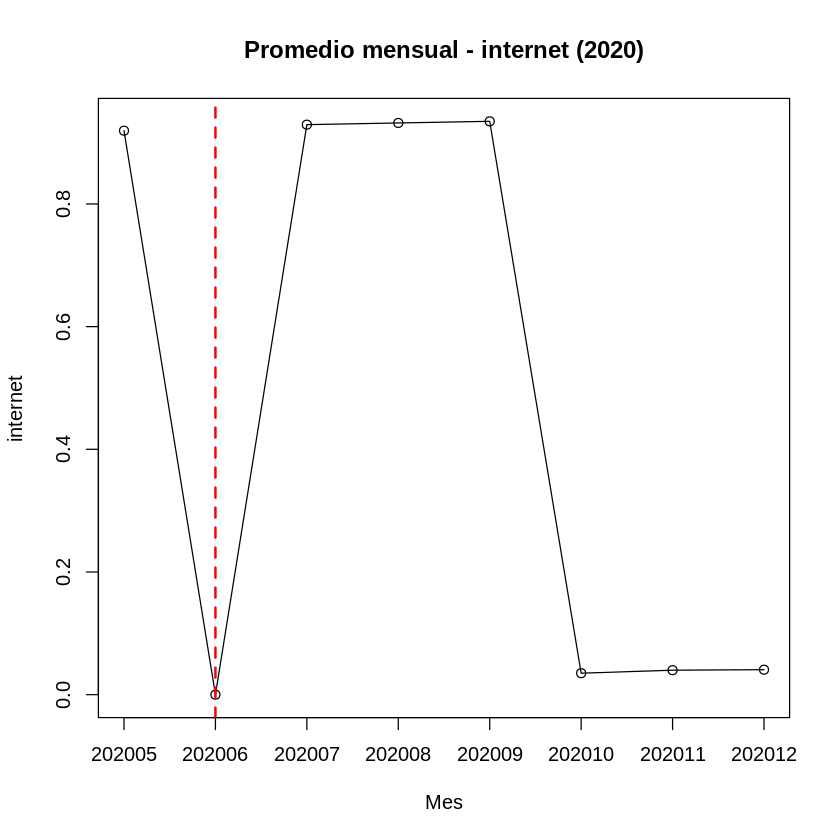

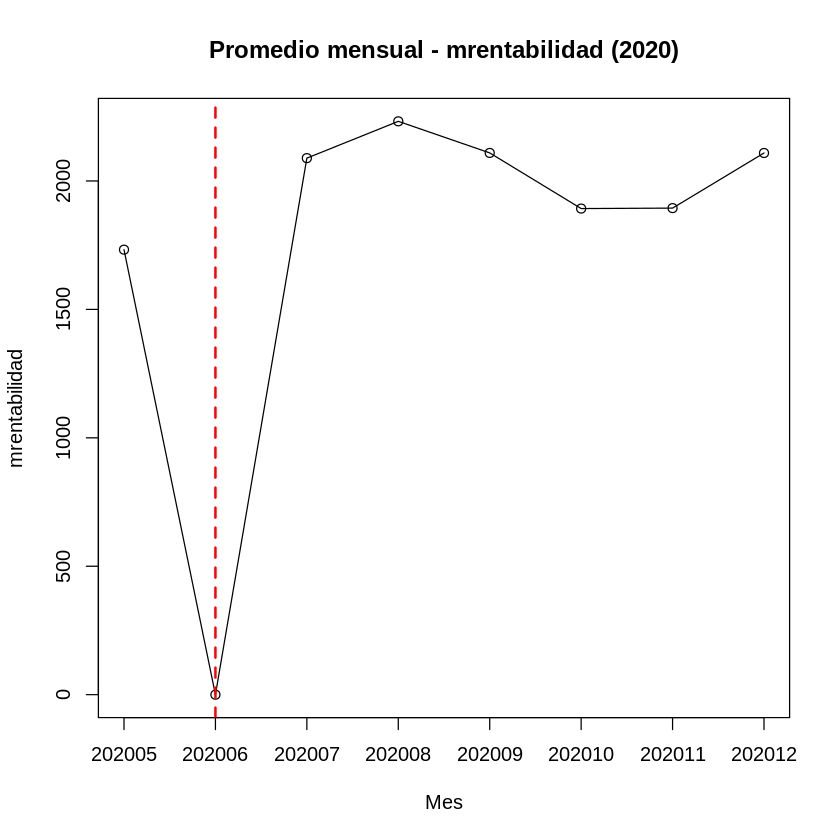

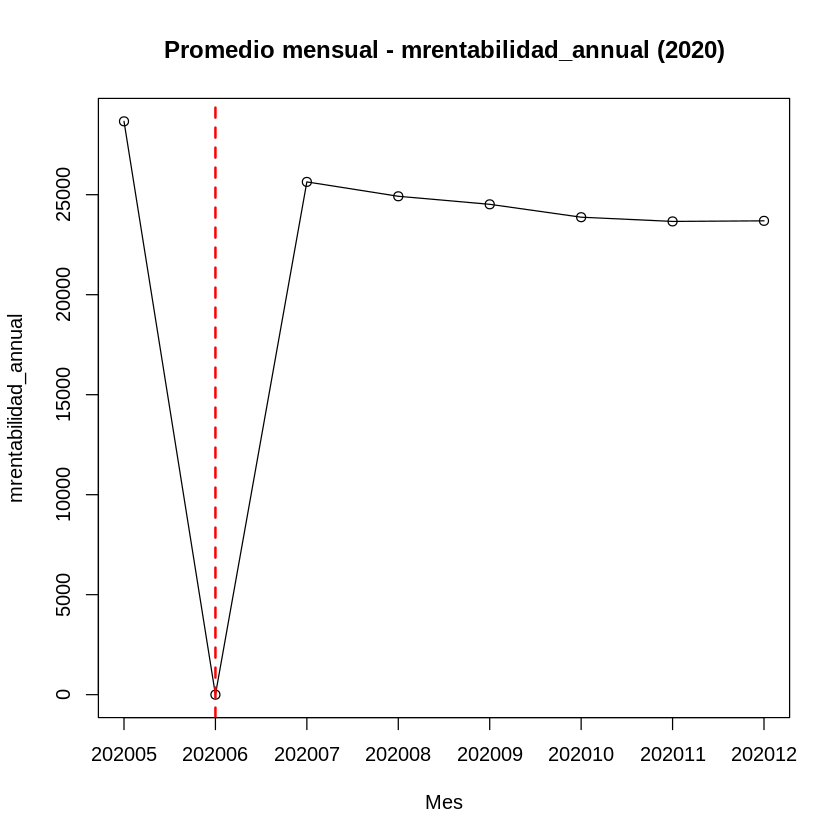

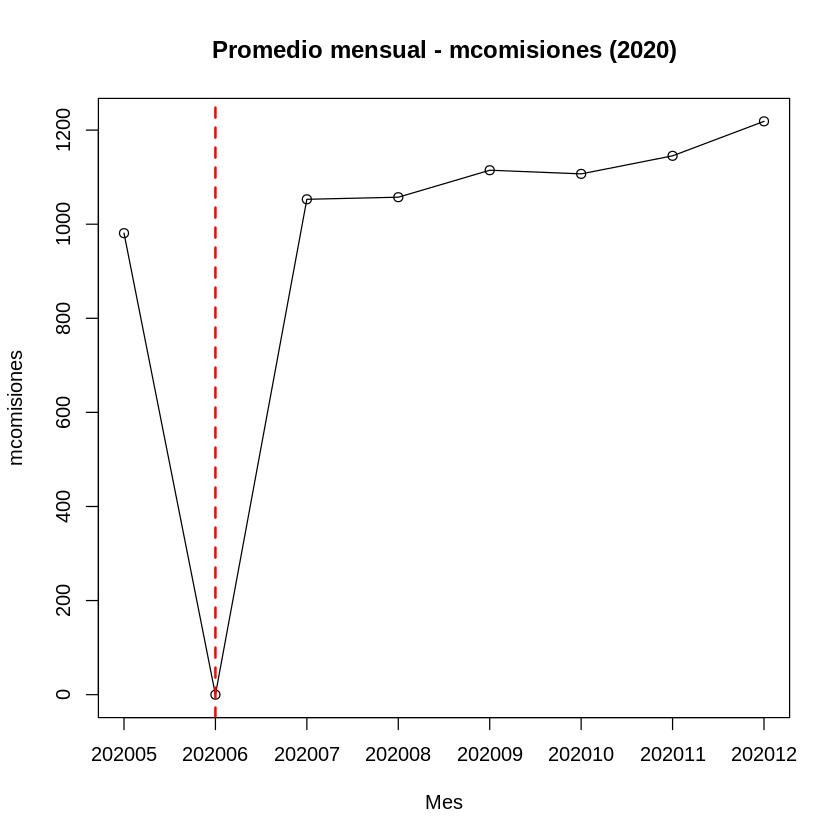

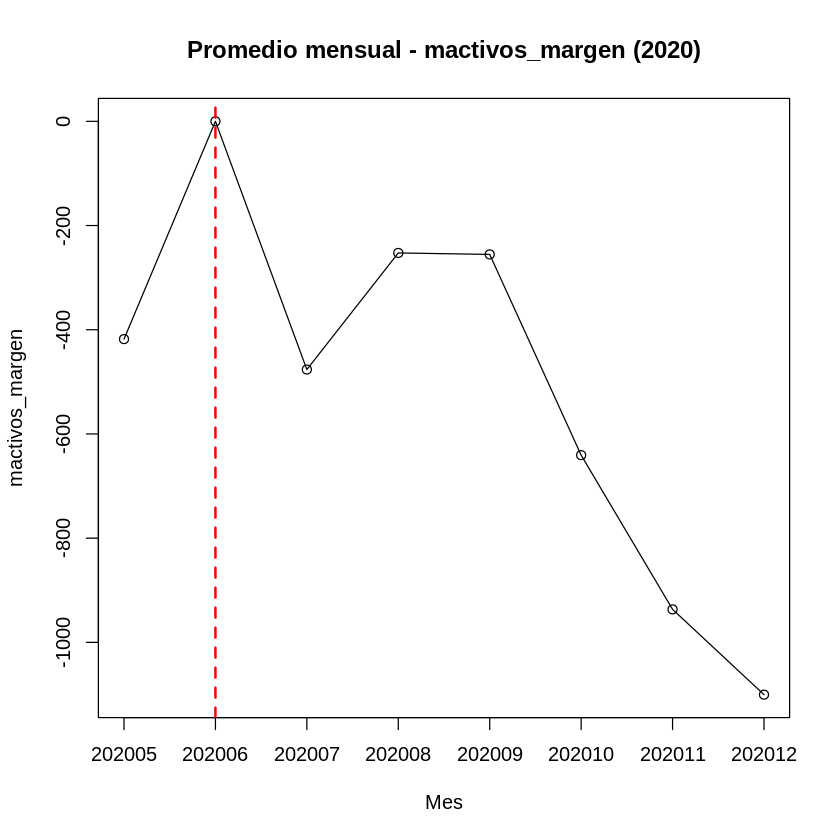

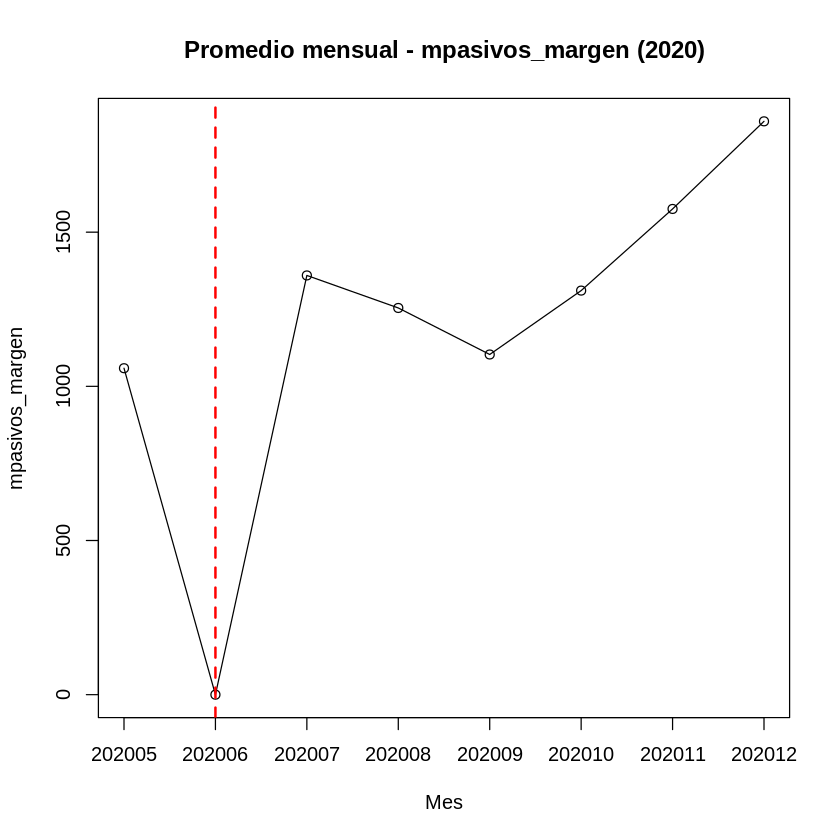

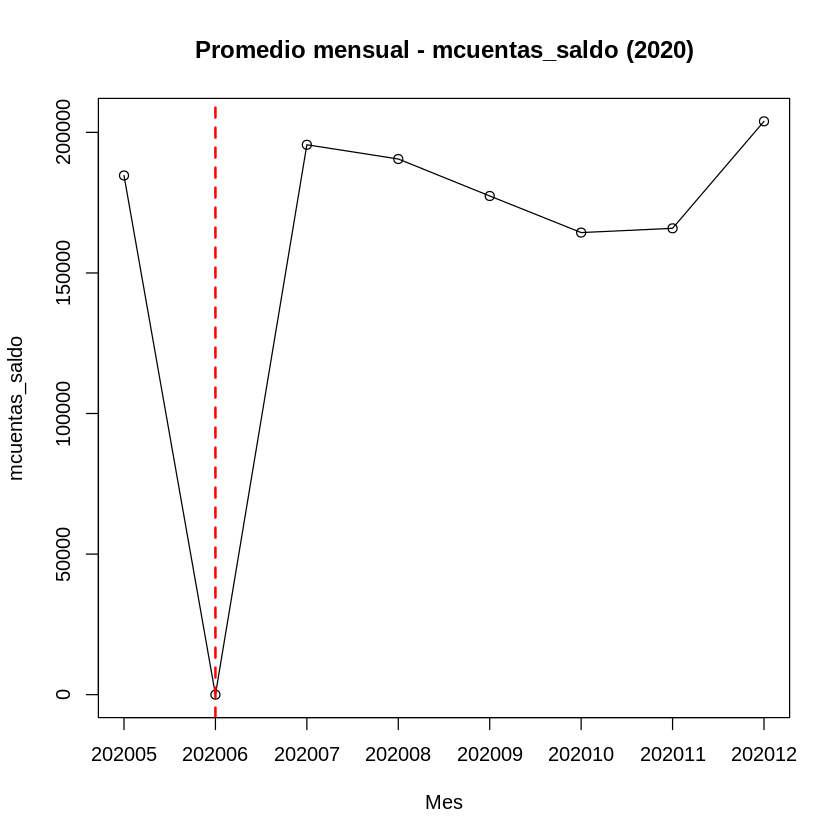

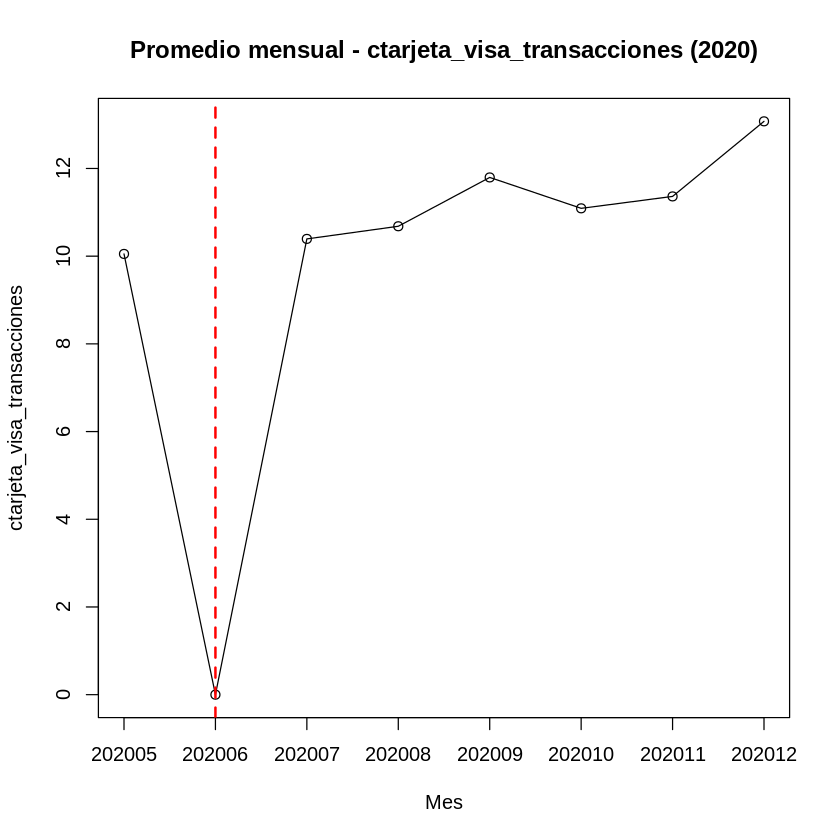

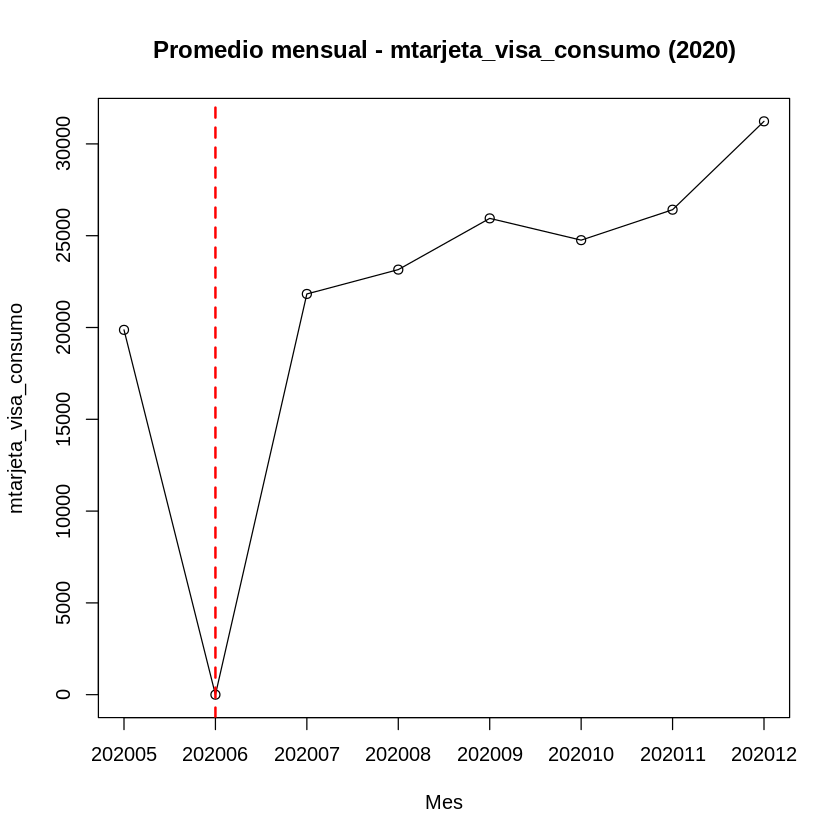

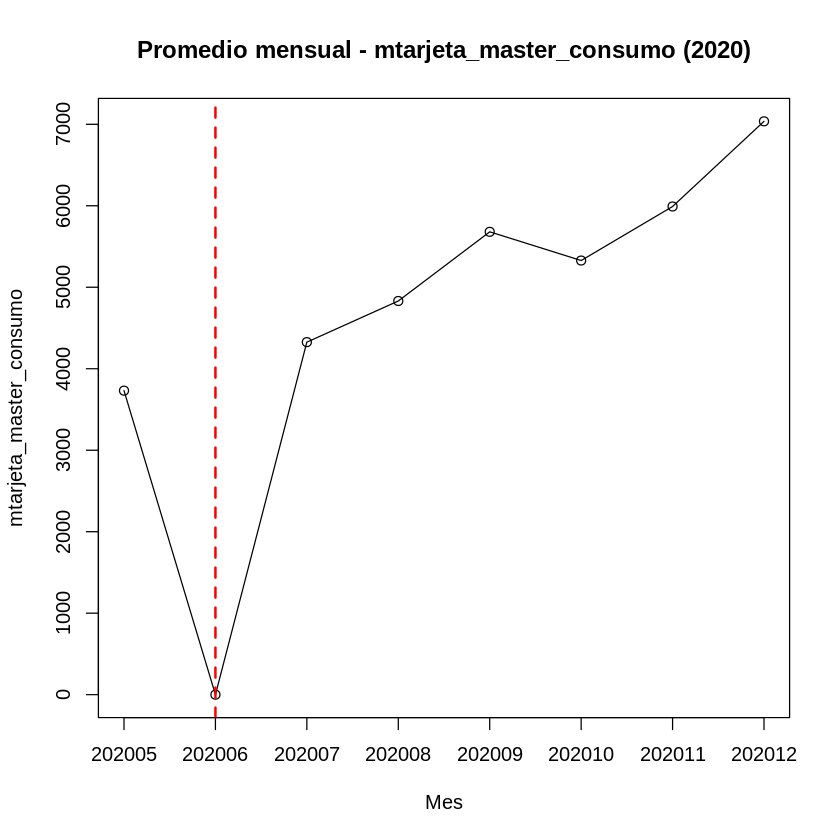

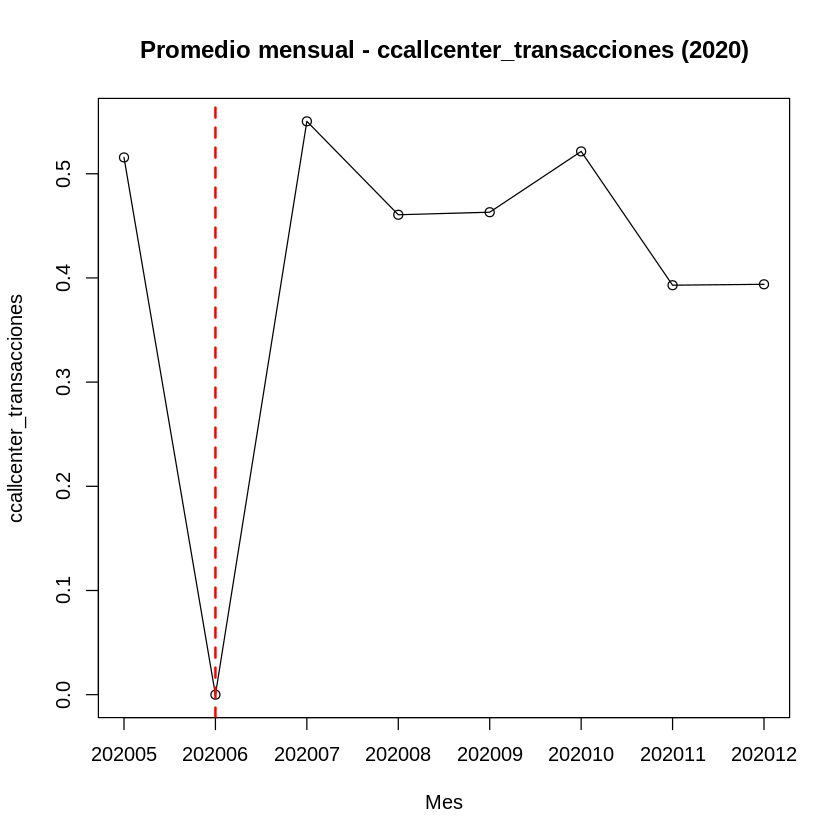

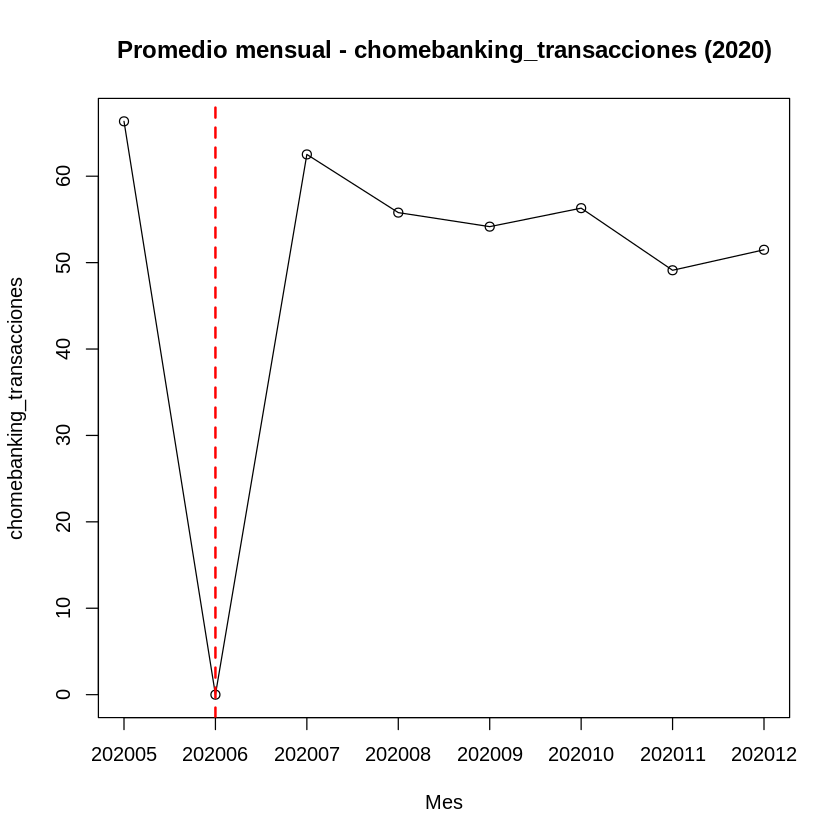

In [ ]:
for (campo in columnas_afectadas) {
  # Filtrar solo el período 2020
  tbl <- dataset[foto_mes >= 202001 & foto_mes <= 202012,
                 .(valor_medio = mean(get(campo), na.rm = TRUE)),
                 by = foto_mes]

  # Calcular límites del eje Y
  ymin <- min(tbl$valor_medio, na.rm = TRUE)
  ymax <- max(tbl$valor_medio, na.rm = TRUE)
  if (ymin == ymax) {
    ymin <- ymin - 0.1 * abs(ymin)
    ymax <- ymax + 0.1 * abs(ymax)
  }

  # Graficar
  plot(
    x = 1:nrow(tbl),
    y = tbl$valor_medio,
    type = "o",
    main = paste0("Promedio mensual - ", campo, " (2020)"),
    xlab = "Mes",
    ylab = campo,
    xaxt = "n",
    ylim = c(ymin, ymax)
  )

  axis(1, at = 1:nrow(tbl), labels = tbl$foto_mes)

  # Línea vertical en junio 2020
  pos_202006 <- which(tbl$foto_mes == 202006)
  if (length(pos_202006) == 1) {
    abline(v = pos_202006, col = "red", lty = 2, lwd = 2)
  }
}


#### 7.3.1.3  DR  Data Drifting
Se intenta corregir el data drifting, quizas ajustando por IPC ...
<br>Esta parte podrá ser abordada por todos los Analistas y también la Gerenciapero se decide pedagogicamente no incluirla en esta primer version para reducir la carga cognitiva

In [ ]:
# sin codigo en esta primera version del workflow

#### 7.3.1.3  FE_intra_manual Feature Engineering intra-mes

Agrego campos nuevos dentro del mismo mes, SIN considerar la historia.

In [ ]:
# esta funcion atributos presentes existe debido a que las modalidades poseen datasets con distinta cantidad de campos
atributos_presentes <- function( patributos )
{
  atributos <- unique( patributos )
  comun <- intersect( atributos, colnames(dataset) )

  return(  length( atributos ) == length( comun ) )
}

# el mes 1,2, ..12
if( atributos_presentes( c("foto_mes") ))
  dataset[, kmes := foto_mes %% 100]

# variable extraida de una tesis de maestria de Irlanda
if( atributos_presentes( c("mpayroll", "cliente_edad") ))
  dataset[, mpayroll_sobre_edad := mpayroll / cliente_edad]


In [ ]:
# visualizo las columas del dataset a esta etapa
colnames(dataset)

[1] "numero_de_cliente"           "foto_mes"                   
 [3] "internet"                    "cliente_edad"               
 [5] "cliente_antiguedad"          "mrentabilidad"              
 [7] "mrentabilidad_annual"        "mcomisiones"                
 [9] "mactivos_margen"             "mpasivos_margen"            
[11] "cproductos"                  "mcuenta_corriente"          
[13] "mcaja_ahorro"                "cdescubierto_preacordado"   
[15] "mcuentas_saldo"              "ctarjeta_visa_transacciones"
[17] "mtarjeta_visa_consumo"       "mtarjeta_master_consumo"    
[19] "mprestamos_personales"       "cpayroll_trx"               
[21] "mpayroll"                    "ccomisiones_mantenimiento"  
[23] "ccallcenter_transacciones"   "chomebanking_transacciones" 
[25] "ctrx_quarter"                "Master_status"              
[27] "Master_fechaalta"            "Master_mpagominimo"         
[29] "Visa_status"                 "Visa_fechaalta"             
[31] "Visa_mpagominimo"            "clase_ternaria"             
[33] "kmes"                        "mpayroll_sobre_edad"

#### 7.3.1.4  FE_rf Feature Engineering de nuevas variables a partir de hojas de Random Forest

Esto se mostrará unicamente a la *modalidad Analista Sr*

In [ ]:
# No se implementa Feature Engineering a partir de Random Forest

#### 7.3.1.5  FEhist Feature Engineering historico

El Fature Engineering Histórico es la etapa que más aporta a la ganancia final, ya que enriquece cada registro del dataset con su historia.

Para cada campo del dataset original (*)
se crean lo siguientes campos de a partir de la historia
* lag1  lags de orden 1
* delta1  =  valor actual - lag1
* lag2  lags de orden 2
* delta2  = valor actual - lag2


(*) Excepto para los campos  <numero_de_cliente,  foto_mes,  clase_ternaria>

In [ ]:
# Feature Engineering Historico

# todo es lagueable, menos la primary key y la clase
cols_lagueables <- copy( setdiff(
    colnames(dataset),
    c("numero_de_cliente", "foto_mes", "clase_ternaria")
) )

# https://rdrr.io/cran/data.table/man/shift.html

# lags de orden 1
dataset[,
    paste0(cols_lagueables, "_lag1") := shift(.SD, 1, NA, "lag"),
    by = numero_de_cliente,
    .SDcols = cols_lagueables
]

# lags de orden 2
dataset[,
    paste0(cols_lagueables, "_lag2") := shift(.SD, 2, NA, "lag"),
    by = numero_de_cliente,
    .SDcols = cols_lagueables
]

# agrego los delta lags
for (vcol in cols_lagueables)
{
    dataset[, paste0(vcol, "_delta1") := get(vcol) - get(paste0(vcol, "_lag1"))]
    dataset[, paste0(vcol, "_delta2") := get(vcol) - get(paste0(vcol, "_lag2"))]
}


Verificacion de los campos recien creados

In [ ]:
ncol(dataset)
colnames(dataset)

[1] 158

[1] "numero_de_cliente"                  "foto_mes"                          
  [3] "internet"                           "cliente_edad"                      
  [5] "cliente_antiguedad"                 "mrentabilidad"                     
  [7] "mrentabilidad_annual"               "mcomisiones"                       
  [9] "mactivos_margen"                    "mpasivos_margen"                   
 [11] "cproductos"                         "mcuenta_corriente"                 
 [13] "mcaja_ahorro"                       "cdescubierto_preacordado"          
 [15] "mcuentas_saldo"                     "ctarjeta_visa_transacciones"       
 [17] "mtarjeta_visa_consumo"              "mtarjeta_master_consumo"           
 [19] "mprestamos_personales"              "cpayroll_trx"                      
 [21] "mpayroll"                           "ccomisiones_mantenimiento"         
 [23] "ccallcenter_transacciones"          "chomebanking_transacciones"        
 [25] "ctrx_quarter"                       "Master_status"                     
 [27] "Master_fechaalta"                   "Master_mpagominimo"                
 [29] "Visa_status"                        "Visa_fechaalta"                    
 [31] "Visa_mpagominimo"                   "clase_ternaria"                    
 [33] "kmes"                               "mpayroll_sobre_edad"               
 [35] "internet_lag1"                      "cliente_edad_lag1"                 
 [37] "cliente_antiguedad_lag1"            "mrentabilidad_lag1"                
 [39] "mrentabilidad_annual_lag1"          "mcomisiones_lag1"                  
 [41] "mactivos_margen_lag1"               "mpasivos_margen_lag1"              
 [43] "cproductos_lag1"                    "mcuenta_corriente_lag1"            
 [45] "mcaja_ahorro_lag1"                  "cdescubierto_preacordado_lag1"     
 [47] "mcuentas_saldo_lag1"                "ctarjeta_visa_transacciones_lag1"  
 [49] "mtarjeta_visa_consumo_lag1"         "mtarjeta_master_consumo_lag1"      
 [51] "mprestamos_personales_lag1"         "cpayroll_trx_lag1"                 
 [53] "mpayroll_lag1"                      "ccomisiones_mantenimiento_lag1"    
 [55] "ccallcenter_transacciones_lag1"     "chomebanking_transacciones_lag1"   
 [57] "ctrx_quarter_lag1"                  "Master_status_lag1"                
 [59] "Master_fechaalta_lag1"              "Master_mpagominimo_lag1"           
 [61] "Visa_status_lag1"                   "Visa_fechaalta_lag1"               
 [63] "Visa_mpagominimo_lag1"              "kmes_lag1"                         
 [65] "mpayroll_sobre_edad_lag1"           "internet_lag2"                     
 [67] "cliente_edad_lag2"                  "cliente_antiguedad_lag2"           
 [69] "mrentabilidad_lag2"                 "mrentabilidad_annual_lag2"         
 [71] "mcomisiones_lag2"                   "mactivos_margen_lag2"              
 [73] "mpasivos_margen_lag2"               "cproductos_lag2"                   
 [75] "mcuenta_corriente_lag2"             "mcaja_ahorro_lag2"                 
 [77] "cdescubierto_preacordado_lag2"      "mcuentas_saldo_lag2"               
 [79] "ctarjeta_visa_transacciones_lag2"   "mtarjeta_visa_consumo_lag2"        
 [81] "mtarjeta_master_consumo_lag2"       "mprestamos_personales_lag2"        
 [83] "cpayroll_trx_lag2"                  "mpayroll_lag2"                     
 [85] "ccomisiones_mantenimiento_lag2"     "ccallcenter_transacciones_lag2"    
 [87] "chomebanking_transacciones_lag2"    "ctrx_quarter_lag2"                 
 [89] "Master_status_lag2"                 "Master_fechaalta_lag2"             
 [91] "Master_mpagominimo_lag2"            "Visa_status_lag2"                  
 [93] "Visa_fechaalta_lag2"                "Visa_mpagominimo_lag2"             
 [95] "kmes_lag2"                          "mpayroll_sobre_edad_lag2"          
 [97] "internet_delta1"                    "internet_delta2"                   
 [99] "cliente_edad_delta1"                "cliente_edad_delta2"               
[1

#### 7.3.1.6  FEhist Reduccion dimensionalidad con canaritos

Esta etapa solo se mostrará a la *modalidad Anlista Sr* por algun canal secreto de forma de no confundir a los *Analista Jr*  nni distraer con detalles operativos a la estratégica *Modalidad Gerencial*

In [ ]:
# No se implementa la reduccion de la dimensionalidad con canaritos

### 7.3.2 Modelado

#### 7.3.2.1 Training Strategy

Esta etapa de Workflow de  Training Strategy esta pensada para la *Modalidad Gerencial* que posee el dataset de [202005, 202109]
<br> Si usted es un Analista, posee el periodo de [201901, 202109] y deberá experimentar en que meses le conviene experimentar

<br> A la *Modalidad Gerencial* no se le complicada la vida con el undersampling de los continua, por eso PARAM$trainingstrategy$training_pct <- 1.0
<br> Sin embargo, si usted es  *Analista SR* posee un dataset 50 veces ( filas x columnas) más grande que la *Modalidad Gerencial*  y por un tema de velocidad y experimentación más rápida puede llegar a necesitar activar el undersampling de la clase mayoritaria, a pesar de estar corriendo en Google Cloud.

Se hace una estrategia de entrenamiento muy sencilla, tomando todos los meses posibles, SIN eliminar nada x pandemia ni por ningun otro motivo

* future = 202109  obviamente completo

* final_train =  [ 202005, 202107 ]  con un undersampling de los CONTINUA del 2% por un tema de velocidad

* training
   * testing = NO HAY
   * validation =  202107   completo, sin undersampling
   * training = [ 202005, 202106 ]  donde se consideran el 100% de los CONTINUA

In [ ]:
PARAM$trainingstrategy$validate <- c(202107)

PARAM$trainingstrategy$training <- c(
  202106, 202105, 202104, 202103, 202102, 202101,
  202012, 202011, 202010, 202009, 202008, 202007,
  202006, 202005
)

PARAM$trainingstrategy$training_pct <- 1.0


PARAM$trainingstrategy$positivos <- c( "BAJA+1", "BAJA+2")

In [ ]:
# seteo la clase01   1={BAJA+1, BAJA+2}   0={CONTINUA}
dataset[, clase01 := ifelse( clase_ternaria %in% PARAM$trainingstrategy$positivos, 1, 0 )]

In [ ]:
# los campos en los que se entrena
campos_buenos <- copy( setdiff(
    colnames(dataset), c("clase_ternaria","clase01","azar"))
)

In [ ]:
# preparo para que se puede hacer undersampling de los CONTINUA
#  solamente por un tema de VELOCIDAD
set.seed(PARAM$semilla_primigenia, kind = "L'Ecuyer-CMRG")
dataset[, azar:=runif(nrow(dataset))]

# undersampling de los CONTINUA
dataset[, fold_train :=  foto_mes %in%  PARAM$trainingstrategy$training &
    (clase_ternaria %in% c("BAJA+1", "BAJA+2") |
     azar < PARAM$trainingstrategy$training_pct ) ]


if( !require("lightgbm")) install.packages("lightgbm")
require("lightgbm")

dtrain <- lgb.Dataset(
  data= data.matrix(dataset[fold_train == TRUE, campos_buenos, with = FALSE]),
  label= dataset[fold_train == TRUE, clase01],
  free_raw_data= TRUE
)

Loading required package: lightgbm

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lightgbm’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lightgbm



In [ ]:
# datos de validation
dvalidate <- lgb.Dataset(
  data= data.matrix(dataset[foto_mes %in% PARAM$trainingstrategy$validate, campos_buenos, with = FALSE]),
  label= dataset[foto_mes %in% PARAM$trainingstrategy$validate, clase01],
  free_raw_data= TRUE
)

nrow(dvalidate)

[1] 16551

####  7.3.2.2. Hyperparameter Tuning

* Clase binaria que se optimiza :  positivos = [ BAJA+1, BAJA+2 ]

* Metrica que se optimiza **AUC** Area Under Curve de la  ROC Curve

es muy importante notar que intencionalmente  **NO** se está optimizando la funcion de ganancia del problema

* Cantidad de iteraciones inteligentes de la Optimizacion Bayesiana = **10**

* Parametros no default, fijos de LightGBM que no se optimizan
  * max_bin = 31 , Alienigenas Ancestrales contruyeron las pirámides y dejaron a la humanidad en un jeroglifico  *max_bin=31*
  * feature_fraction = 0.5  para poner algo que generalmente no falla
  * learning_rate = 0.03  para que aprenda lento


* Parametros que se optimizan en la Bayesian Optimization
  * num_leaves  [8, 256]
  * min_data_in_leaf  [8, 8192]

In [ ]:
# paquetes necesarios para la Bayesian Optimization
if(!require("DiceKriging")) install.packages("DiceKriging")
require("DiceKriging")

if(!require("mlrMBO")) install.packages("mlrMBO")
require("mlrMBO")

Loading required package: DiceKriging

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DiceKriging’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: DiceKriging

Loading required package: mlrMBO

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mlrMBO’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘fastmatch’, ‘RcppArmadillo’, ‘mlr’, ‘ParamHelpers’, ‘smoof’, ‘BBmisc’, ‘checkmate’, ‘lhs’, ‘parallelMap’


Loading required package: mlrMBO

Loading required package: mlr

Loading required package: ParamHelpers


Attaching package: ‘ParamHelpers’


The following object is masked from ‘package:R.utils’:

    isVector



Attaching package: ‘mlr’


The following objects are masked from ‘package

Definición de la Bayesian Optimization
<br> Si se desea optimizar un hiperparámetro que esta como fijo, debe QUITARSE de param_fijos y agregarse a PARAM$hipeparametertuning$hs

In [ ]:
# valor ridiculamente bajo para que corra rapido en el aula y no molestar a la *Modalidad Gerencial*
PARAM$hipeparametertuning$num_interations <- 10

# parametros fijos del LightGBM
PARAM$lgbm$param_fijos <- list(
  objective= "binary",
  metric= "auc",
  first_metric_only= TRUE,
  boost_from_average= TRUE,
  feature_pre_filter= FALSE,
  verbosity= -100,
  force_row_wise= TRUE, # para evitar warning
  seed= PARAM$semilla_primigenia,
  max_bin= 31,
  learning_rate= 0.03,
  feature_fraction= 0.5,
  num_iterations= 2048,  # valor grande, lo limita early_stopping_rounds
  early_stopping_rounds= 200
)

PARAM$hipeparametertuning$hs <- makeParamSet(
  makeIntegerParam("num_leaves", lower = 2L, upper = 256L),
  makeIntegerParam("min_data_in_leaf", lower = 2L, upper = 8192L)
)

Función "señora caja negra"  que es llamada para verificar la realidad por la Bayesian Optimization

In [ ]:
# En  x llegan los parmaetros de la bayesiana
#  devuelve la AUC en validate del modelo entrenado
#  en el parametro x llegan los hiperparámetros que se estan optimizando

EstimarGanancia_AUC_lightgbm <- function(x) {

  message(format(Sys.time(), "%a %b %d %X %Y"))

  # uno la lista de hiperparametros : fijos + variables
  param_completo <- c(PARAM$lgbm$param_fijos, x)

  # entreno LightGBM
  modelo_train <- lgb.train(
    data= dtrain,
    valids= list(valid = dvalidate),
    eval= "auc",
    param= param_completo,
    verbose= -100
  )

  # recupero la AUC en validation
  AUC <- modelo_train$record_evals$valid$auc$eval[[modelo_train$best_iter]]

  # esta es la forma de devolver un parametro extra
  attr(AUC, "extras") <- list("num_iterations"= modelo_train$best_iter)

  # hago espacio en la memoria
  rm(modelo_train)
  gc(full= TRUE, verbose= FALSE)

  return(AUC)
}

seteo de la Bayesian Optimization (complejo)
<br> copiado y pegado de la documentación de la librería

In [ ]:
configureMlr(show.learner.output = FALSE)

# configuro la busqueda bayesiana,  los hiperparametros que se van a optimizar
# por favor, no desesperarse por lo complejo
obj.fun <- makeSingleObjectiveFunction(
    fn= EstimarGanancia_AUC_lightgbm, # la funcion que voy a maximizar
    minimize= FALSE, # estoy Maximizando AUC
    noisy= FALSE,
    par.set= PARAM$hipeparametertuning$hs,
    has.simple.signature= FALSE # paso los parametros en una lista
)

# cada 600 segundos guardo el resultado intermedio
ctrl <- makeMBOControl(
    save.on.disk.at.time= 600,
    save.file.path= "HT.RDATA"
)

# indico la cantidad de iteraciones que va a tener la Bayesian Optimization
ctrl <- setMBOControlTermination(
    ctrl,
    iters= PARAM$hipeparametertuning$num_interations  # cantidad de iteraciones inteligentes
)

# defino el método estandar para la creacion de los puntos iniciales
#   los "No Inteligentes"
ctrl <- setMBOControlInfill(ctrl, crit = makeMBOInfillCritEI())

# mas configuraciones
surr.km <- makeLearner(
    "regr.km",
    predict.type= "se",
    covtype= "matern3_2",
    control= list(trace = TRUE)
)

Corrida de la Bayesian Optimization,  aqui se hace el trabajo pesado
<br> por favor no se asuste con los warnings que pudieran aparecer

Si corrío a medias y llegó a las iteraciones inteligentes, en el archivo binario HT.RDATA quedó lo ya procesado y es utilizado para retomar la corrida desde lo último que llegó a grabar.

In [ ]:
# inicio la optimizacion bayesiana

if (!file.exists("HT.RDATA")) {
  bayesiana_salida <- mbo(obj.fun, learner= surr.km, control= ctrl)
} else {
  bayesiana_salida <- mboContinue("HT.RDATA") # retomo en caso que ya exista
}

Warning message in mboContinue("HT.RDATA"):
“Tuning ended with term.iter. No need to continue. Simply returning stored result.”


la bayesian optimization ha corrido, extraigo los mejores hiperparametros

In [ ]:
# almaceno los resultados de la Bayesian Optimization
# y capturo los mejores hiperparametros encontrados

tb_bayesiana <- as.data.table(bayesiana_salida$opt.path)

# ordeno en forma descendente por AUC = y
setorder(tb_bayesiana, -y, -num_iterations)

# grabo para eventualmente poder utilizarlos en OTRA corrida
fwrite( tb_bayesiana,
  file="BO_log.txt",
  sep="\t"
)

# los mejores hiperparámetros son los que quedaron en el registro 1 de la tabla
PARAM$out$lgbm$mejores_hiperparametros <- tb_bayesiana[
  1, # el primero es el de mejor AUC
  list(num_leaves, min_data_in_leaf, num_iterations)
]

print(PARAM$out$lgbm$mejores_hiperparametros)

   num_leaves min_data_in_leaf num_iterations
        <int>            <int>          <int>
1:        187                2            762


### 7.3.3 Produccion

### Final Training
Construyo el modelo final, que es uno solo, no hace ningun tipo de particion < training, validation, testing>]

#### Final Training Dataset

Aqui esta la gran decision de en qué meses hago el Final Training
<br> debo utilizar los mejores hiperparámetros que encontré en la optimización bayesiana

In [ ]:
PARAM$trainingstrategy$final_train <- c( 202107,
  202106, 202105, 202104, 202103, 202102, 202101,
  202012, 202011, 202010, 202009, 202008, 202007,
  202006, 202005)

dataset[, fold_final_train := foto_mes %in% PARAM$trainingstrategy$final_train ]

# creo el dfinal_train en formato  LightGBM
dfinal_train <- lgb.Dataset(
  data= data.matrix(dataset[fold_final_train == TRUE, campos_buenos, with= FALSE]),
  label= dataset[fold_final_train == TRUE, clase01],
  free_raw_data= TRUE
)

nrow( dfinal_train) # verifico el tamaño

[1] 240562

#### Final Training Hyperparameters

In [ ]:
# uno los parametros fijos y los mejores encontrados de los variables
fijos <- copy(PARAM$lgbm$param_fijos)

# quito lo que optimice en la Bayesian Optimization
fijos$num_iterations <- NULL
fijos$early_stopping_rounds <- NULL

# agrego a los hiperparametros fijos los que encontre con la Bayesian Optimization
param_final <- c(fijos, PARAM$out$lgbm$mejores_hiperparametros)

#### Training
Genero el modelo final, siempre sobre TODOS los datos de  final_train, sin hacer ningun tipo de undersampling de la clase mayoritaria

In [ ]:
final_model <- lgb.train(
  data= dfinal_train,
  param= param_final,
  verbose= -100
)

In [ ]:
# grabo a disco el modelo en un formato para seres humanos ... ponele ...

lgb.save(final_model, "modelo.txt")

In [ ]:
# ahora imprimo la importancia de variables

tb_importancia <- as.data.table(lgb.importance(final_model))
archivo_importancia <- "impo.txt"

fwrite( tb_importancia,
  file= archivo_importancia,
  sep= "\t"
)

In [ ]:
dataset[foto_mes == 202109]

numero_de_cliente,foto_mes,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,⋯,Visa_mpagominimo_delta1,Visa_mpagominimo_delta2,kmes_delta1,kmes_delta2,mpayroll_sobre_edad_delta1,mpayroll_sobre_edad_delta2,clase01,azar,fold_train,fold_final_train
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
29186441,202109,0,62,298,9091.55,82262.60,2727.45,-2427.31,7852.80,⋯,879.75,1970.64,1,2,0.00000,0.00000,0,0.31814188,FALSE,FALSE
29187961,202109,0,62,328,3897.76,66564.45,3527.35,-1905.02,2220.80,⋯,28269.30,29547.87,1,2,0.00000,0.00000,0,0.52826263,FALSE,FALSE
29193101,202109,0,69,381,16240.40,139432.68,11161.18,2613.40,1716.71,⋯,-14850.18,-15636.09,1,2,0.00000,0.00000,0,0.01410101,FALSE,FALSE
29193281,202109,0,55,174,4776.17,63249.84,4989.35,-1839.59,1262.27,⋯,598.23,410.55,1,2,0.00000,0.00000,0,0.89304321,FALSE,FALSE
29198891,202109,0,55,328,5483.02,41872.17,636.58,-1084.43,5216.09,⋯,504.39,-3284.40,1,2,0.00000,0.00000,0,0.21327790,FALSE,FALSE
29200651,202109,0,66,11,2153.27,18143.74,840.80,-1269.16,2388.06,⋯,-199.41,-422.28,1,2,-3481.12727,-4308.24015,0,0.42809495,FALSE,FALSE
29201701,202109,0,44,25,1938.44,16507.23,502.92,526.02,697.78,⋯,1173.00,-1055.70,1,2,0.00000,0.00000,0,0.88482172,FALSE,FALSE
29205441,202109,0,73,22,282.04,9877.76,0.00,50.89,189.56,⋯,0.00,-316.71,1,2,-971.66178,-971.66178,0,0.91847359,FALSE,FALSE
29207901,202109,0,84,328,1749.89,46435.97,342.04,-68.36,1268.57,⋯,316.71,-961.86,1,2,0.00000,0.00000,0,0.22807221,FALSE,FALSE


### Scoring

Aplico el modelo final a los datos del futuro

In [ ]:
PARAM$trainingstrategy$future <- c(202109)

dfuture <- dataset[ foto_mes %in% PARAM$trainingstrategy$future ]

In [ ]:
# aplico final_model   a dfuture

prediccion <- predict(
  final_model,
  data.matrix(dfuture[, campos_buenos, with= FALSE])
)

#### Tabla Prediccion

In [ ]:
tb_prediccion <- dfuture[, list(numero_de_cliente)]
tb_prediccion[, prob := prediccion]

# grabo las probabilidad del modelo
#  me va a ser util para hacer Ensembles de modelos
fwrite(tb_prediccion,
  file= "prediccion.txt",
  sep= "\t"
)

Kaggle Competition Submit - SALTEAR ESTA PARTE Y PASAR AL FINAL

Genero las salidas y hago los submits a Kaggle
<br>El notebook esta preparado para la Modalidad Gerencial, los analistas deben hacer cambios.
<br> Los analistas deben cambiar **competencia** a SU competencia  "labo-i-2025-rosario-analista-jr"   o  la original "labo-i-2025-rosario"  para los Senior
<br> Los cortes  dependen de la cantidad de registros, multiplicar por 2 para los Analistas Jr y por 10 para los Analista Sr

Los Analista Sr luego de meditar cuidadosamente reducirán la cantidad de cortes

In [ ]:
# genero archivos con los  "envios" mejores
# suba TODOS los archivos a Kaggle

PARAM$kaggle$competencia <- "labo-i-2025-rosario-gerencial"
PARAM$kaggle$cortes <- seq(800, 1300, by = 50)

# ordeno por probabilidad descendente
setorder(tb_prediccion, -prob)

dir.create("kaggle")

for (envios in PARAM$kaggle$cortes) {

  tb_prediccion[, Predicted := 0L] # seteo inicial a 0
  tb_prediccion[1:envios, Predicted := 1L] # marco los primeros

  archivo_kaggle <- paste0("./kaggle/KA", PARAM$experimento, "_", envios, ".csv")

  # grabo el archivo
  fwrite(tb_prediccion[, list(numero_de_cliente, Predicted)],
    file= archivo_kaggle,
    sep= ","
  )

  # subida a Kaggle, armo la linea de comando
  comando <- "kaggle competitions submit"
  competencia <- paste("-c", PARAM$kaggle$competencia)
  arch <- paste( "-f", archivo_kaggle)

  mensaje <- paste0("-m 'envios=", envios,
  "  semilla=", PARAM$semilla_primigenia,
    "'" )

  linea <- paste( comando, competencia, arch, mensaje)

  salida <- system(linea, intern=TRUE) # el submit a Kaggle
  cat(salida, "\n")
}

Warning message in dir.create("kaggle"):
“'kaggle' already exists”


Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 
Successfully submitted to LaboI 2025 Rosario Gerencial 


In [ ]:
# grabo los parametros
if( !require("yaml")) install.packages("yaml")
require("yaml")

write_yaml( PARAM, file="PARAM.yml")

Loading required package: yaml



In [ ]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Sat Jul 05 07:08:00 PM 2025"

ANALISIS DEL MODELO - CURVA DE GANANCIA

In [ ]:
library(data.table)

if( !require("openxlsx")) install.packages("openxlsx")
require("openxlsx")
library(openxlsx)

# cambio el mes objetivo
PARAM$trainingstrategy$future <- c(202107)
dfuture <- dataset[ foto_mes == 202107 ]

# hago la predicción
prediccion <- predict(final_model, data.matrix(dfuture[, campos_buenos, with = FALSE]))

# armo tabla con predicciones, incluyendo el número de cliente
tb_prediccion <- dfuture[, .(numero_de_cliente, clase_ternaria)]
tb_prediccion[, prob := prediccion]

# ordeno por probabilidad descendente
setorder(tb_prediccion, -prob)

# calculo ganancia y ganancia acumulada
tb_prediccion[, gan := ifelse(clase_ternaria == "BAJA+2", 117000, -3000)]
tb_prediccion[, ganancia_acumulada := cumsum(gan)]
tb_prediccion[, pos := .I]

# exporta a Excel
write.xlsx(tb_prediccion, file = "predicciones_202107.xlsx", rowNames = FALSE)

Loading required package: openxlsx

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘openxlsx’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: openxlsx



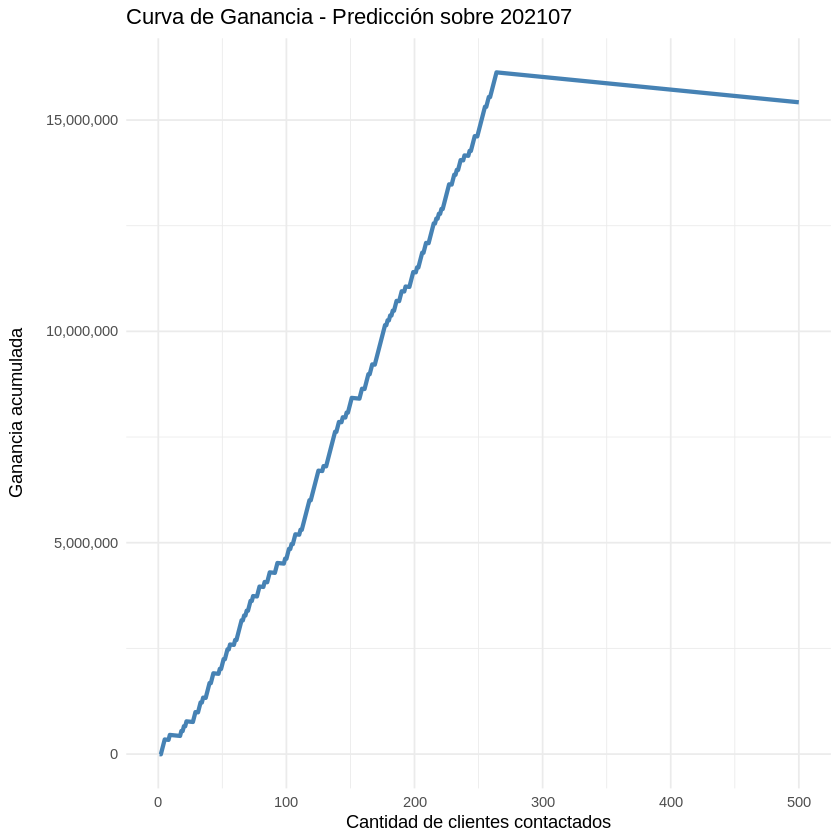

In [ ]:
amostrar <- 500

library(ggplot2)
library(scales)

ggplot(head(tb_prediccion, amostrar), aes(x = pos, y = ganancia_acumulada)) +
  geom_line(color = "steelblue", size = 1.2) +
  labs(
    title = "Curva de Ganancia - Predicción sobre 202107",
    x = "Cantidad de clientes contactados",
    y = "Ganancia acumulada"
  ) +
  theme_minimal() +
  scale_x_continuous(limits = c(0, amostrar)) +
  scale_y_continuous(labels = comma)


In [ ]:
library(data.table)
setorder(tb_importancia, -Gain)  # orden descendente por Gain
print(tb_importancia)


ERROR: Error: object 'tb_importancia' not found
